In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> 1. Wczytanie danych </h2>

In [104]:
data = pd.read_csv('LasVegasTripAdvisorReviews-Dataset.csv', sep = ';', header = 0)

In [105]:
data.head(5)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


<h2> 2. Eksploracyjna analiza danych (EDA) </h2>

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

Wiele cech ma typ "object" ktory bedzie niemozliwy do uzycia w trakcie budowy modelu, dlatego wykorzystany zostanie LabelEncoder.

In [107]:
cols_to_encode = data.select_dtypes('object').columns
cols_to_encode

Index(['User country', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'User continent', 'Review month', 'Review weekday'],
      dtype='object')

In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for c in cols_to_encode:
    le.fit(data[c])
    data[c] = le.transform(data[c])

In [109]:
data.dtypes

User country         int64
Nr. reviews          int64
Nr. hotel reviews    int64
Helpful votes        int64
Score                int64
Period of stay       int64
Traveler type        int64
Pool                 int64
Gym                  int64
Tennis court         int64
Spa                  int64
Casino               int64
Free internet        int64
Hotel name           int64
Hotel stars          int64
Nr. rooms            int64
User continent       int64
Member years         int64
Review month         int64
Review weekday       int64
dtype: object

In [110]:
data['User country'].head(5)

0    46
1    46
2    46
3    45
4     3
Name: User country, dtype: int64

<h3> 2.1 Zbadanie, czy dane zawieraja braki </h3>

In [111]:
data.isna().sum()

User country         0
Nr. reviews          0
Nr. hotel reviews    0
Helpful votes        0
Score                0
Period of stay       0
Traveler type        0
Pool                 0
Gym                  0
Tennis court         0
Spa                  0
Casino               0
Free internet        0
Hotel name           0
Hotel stars          0
Nr. rooms            0
User continent       0
Member years         0
Review month         0
Review weekday       0
dtype: int64

<h3> 2.2 Ogolne statystyki podsumowujace zbior danych </h3>

In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User country,504.0,31.688492,18.500233,0.0,12.00,45.0,46.00,47.0
Nr. reviews,504.0,48.130952,74.996426,1.0,12.00,23.5,54.25,775.0
Nr. hotel reviews,504.0,16.023810,23.957953,0.0,5.00,9.0,18.00,263.0
Helpful votes,504.0,31.751984,48.520783,0.0,8.00,16.0,35.00,365.0
Score,504.0,4.123016,1.007302,1.0,4.00,4.0,5.00,5.0
Period of stay,504.0,1.507937,1.115558,0.0,1.00,2.0,2.25,3.0
Traveler type,504.0,1.539683,1.074932,0.0,1.00,1.0,2.00,4.0
Pool,504.0,0.952381,0.213170,0.0,1.00,1.0,1.00,1.0
Gym,504.0,0.952381,0.213170,0.0,1.00,1.0,1.00,1.0
Tennis court,504.0,0.238095,0.426341,0.0,0.00,0.0,0.00,1.0


Na podstawie powyzszych, prostych statystyk mozna zauwazyc anomalie dla cechy member years, dlatego do sprawdzenia wykorzystane zostana ponizsze wykresy.

Text(0.5, 1.0, 'Value')

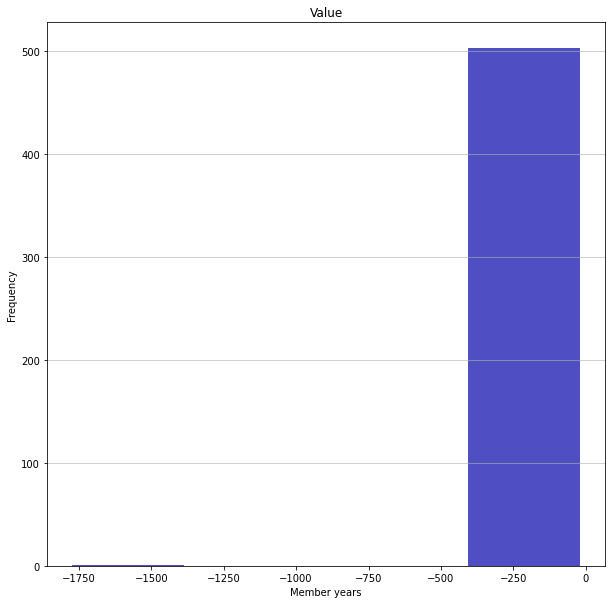

In [113]:
plt.figure(figsize = (10, 10))
plt.hist(x = data['Member years'], bins = 4, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Member years')
plt.ylabel('Frequency')
plt.title('Value')

<AxesSubplot:ylabel='Member years'>

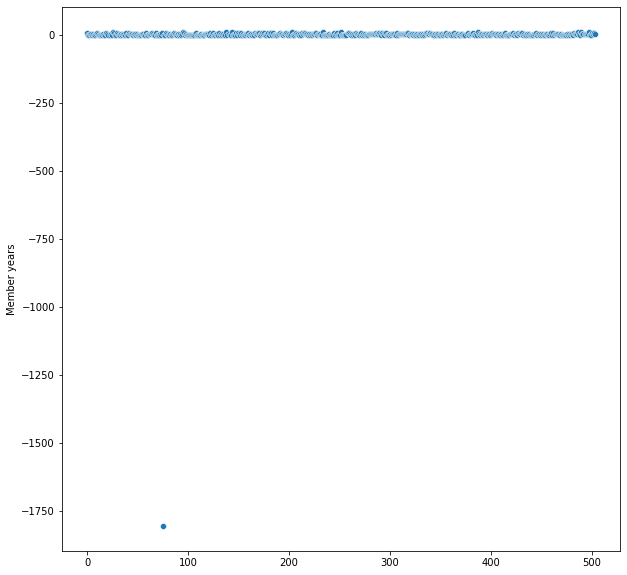

In [114]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = data['Member years'])

In [115]:
data_clean = data[data['Member years'] > 0]

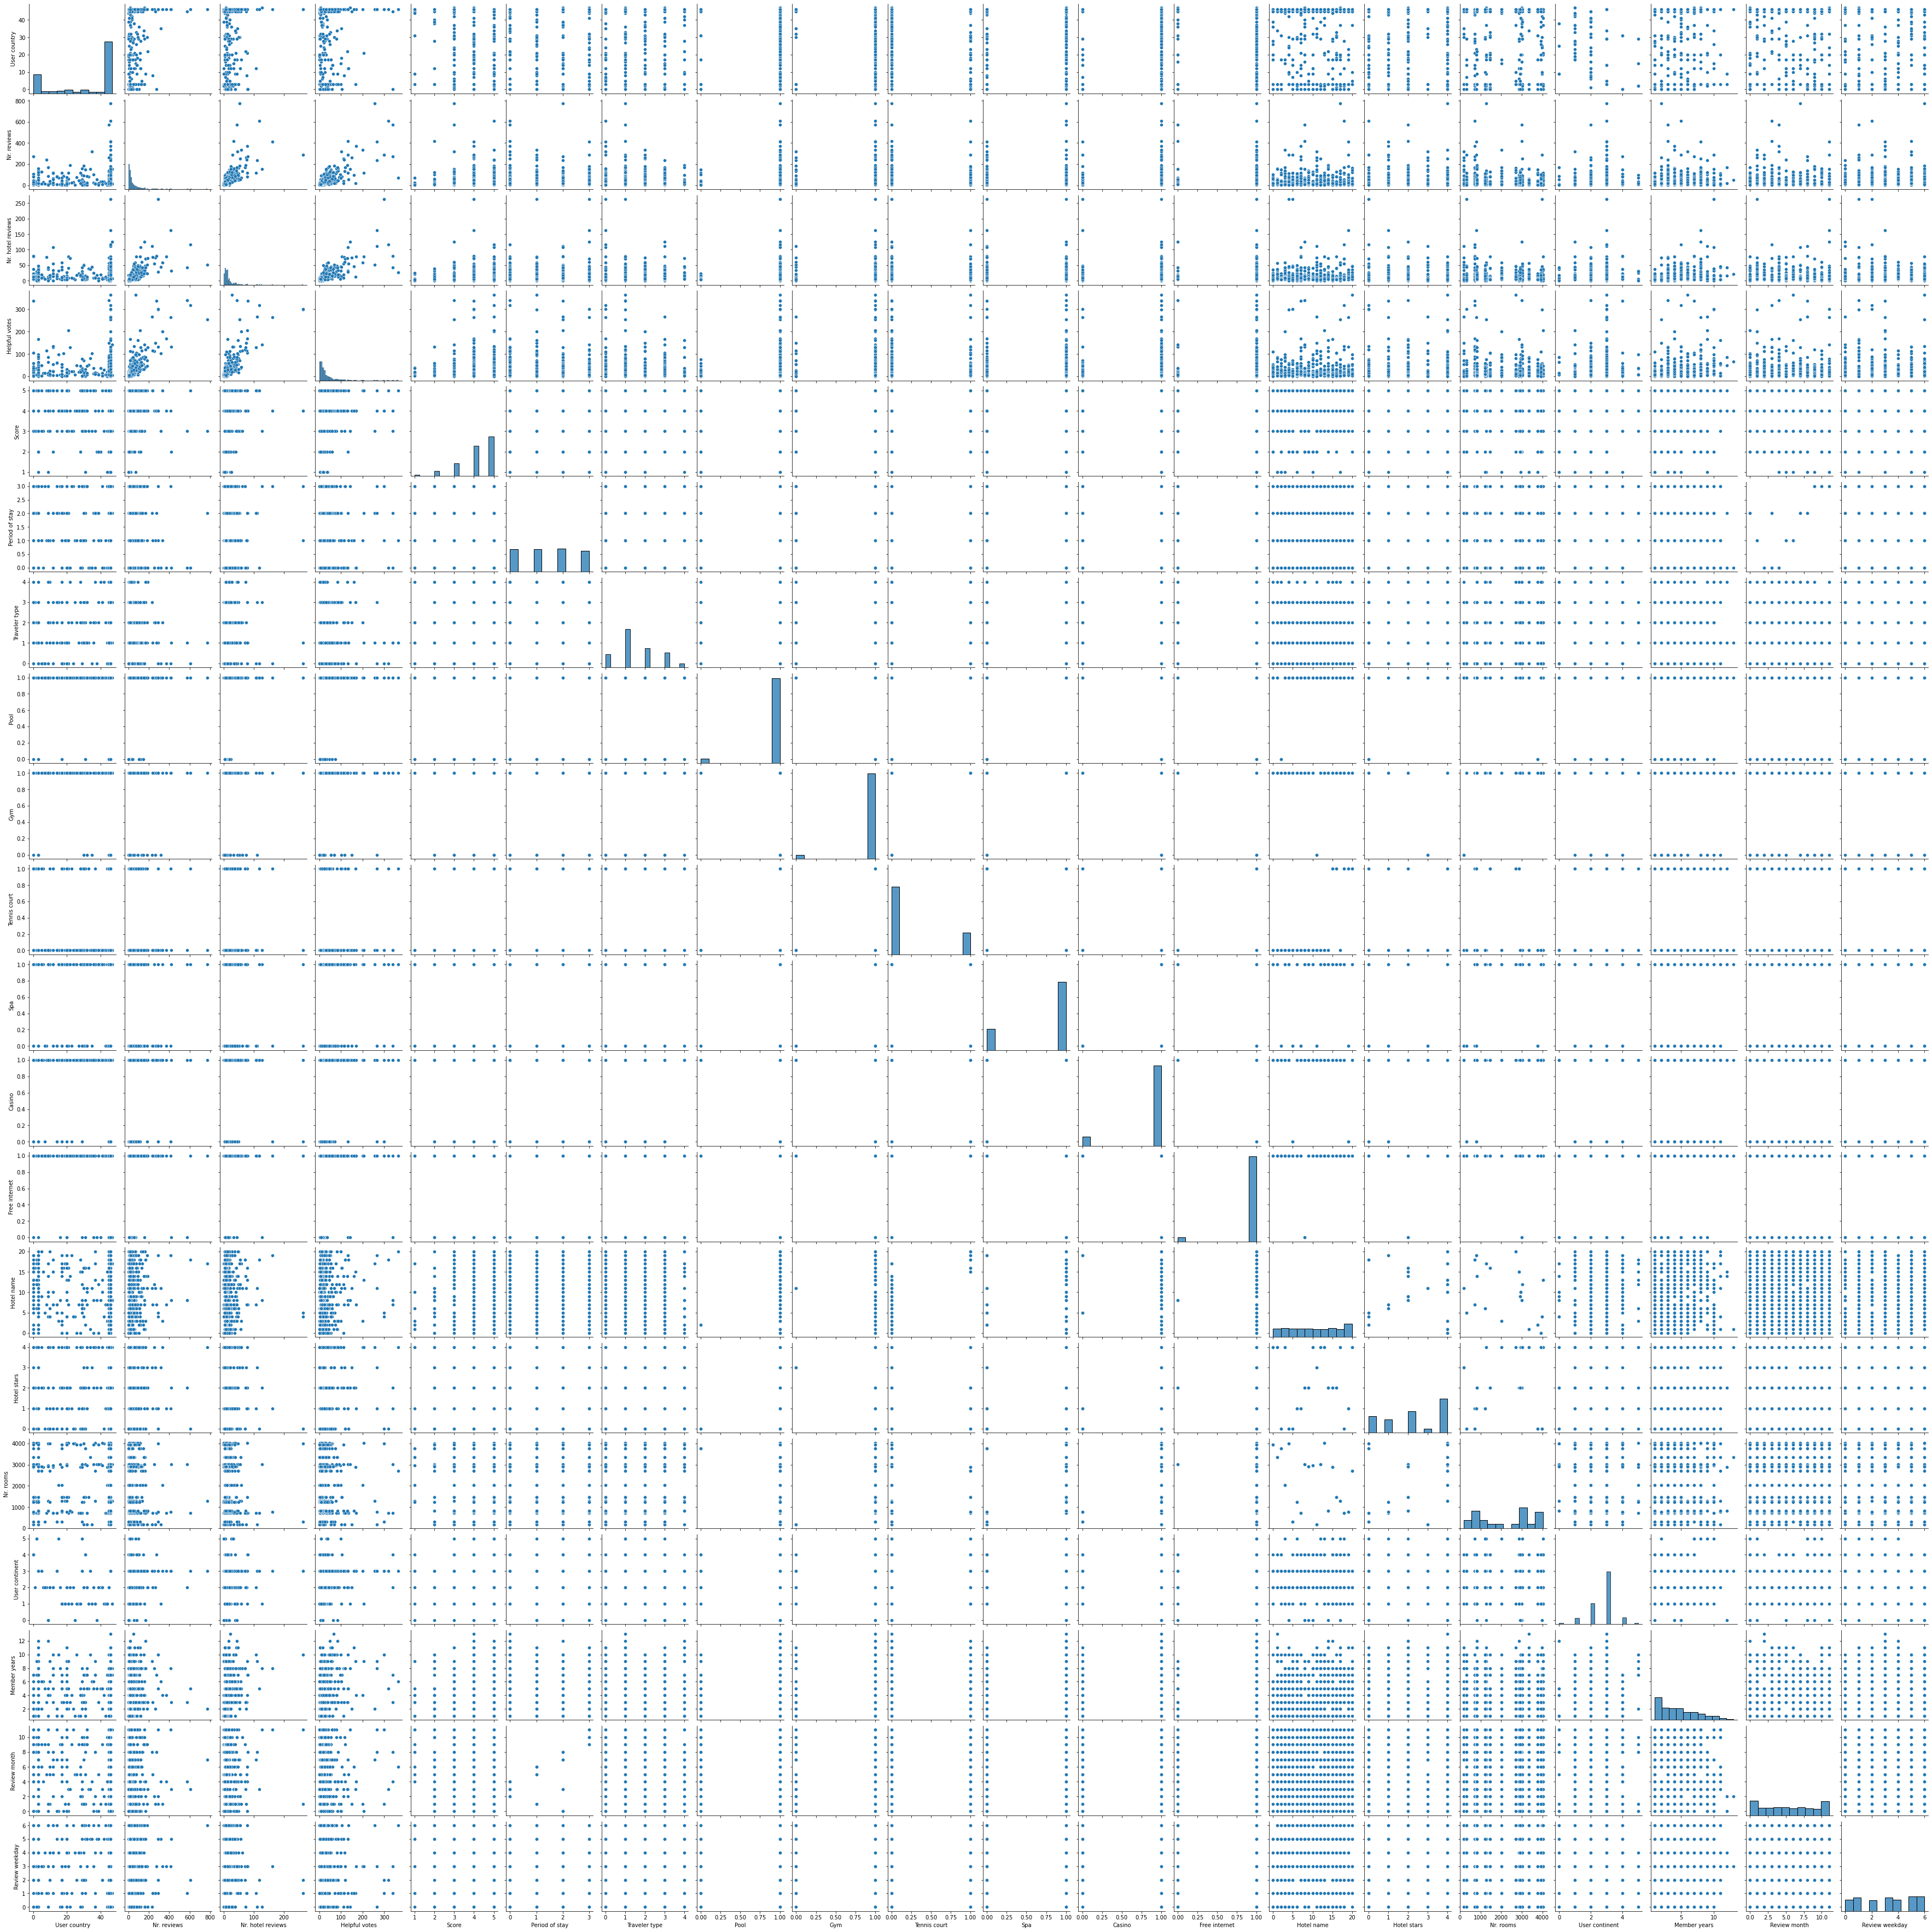

In [116]:
sns.pairplot(data_clean)

<AxesSubplot:>

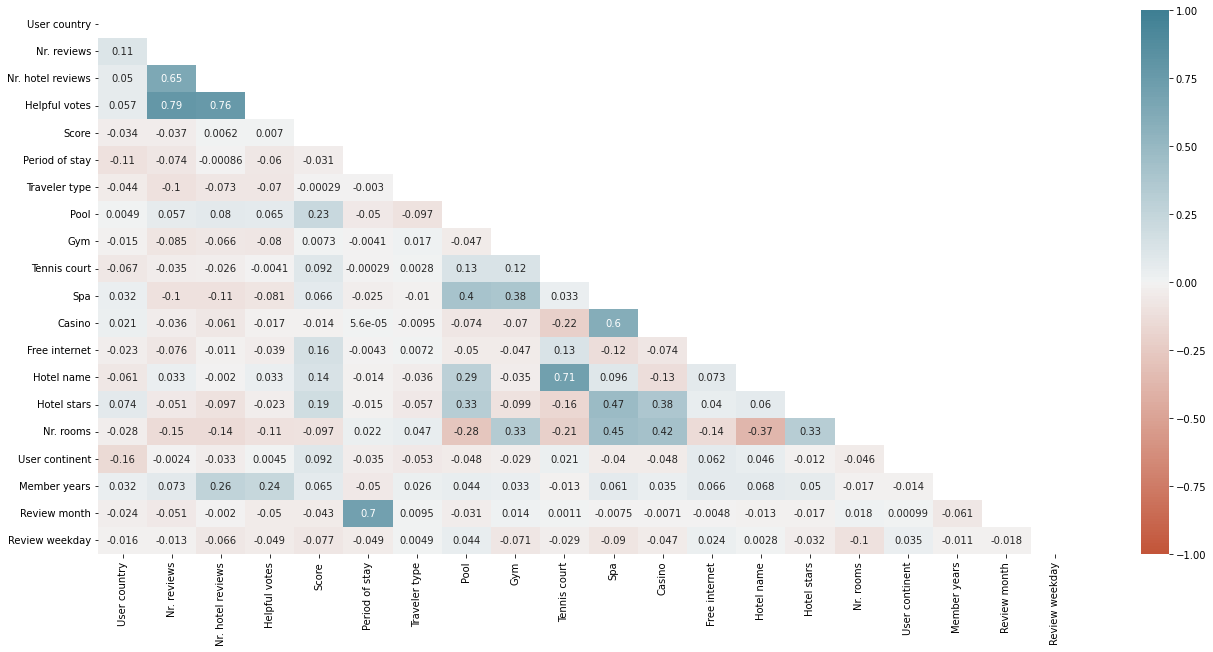

In [117]:
corr = data_clean.corr()
f, ax = plt.subplots(figsize=(22, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot = True)

In [121]:
round(corr.sort_values('Score', ascending = False)['Score'], 2)

Score                1.00
Pool                 0.23
Hotel stars          0.19
Free internet        0.16
Hotel name           0.14
Tennis court         0.09
User continent       0.09
Spa                  0.07
Member years         0.07
Gym                  0.01
Helpful votes        0.01
Nr. hotel reviews    0.01
Traveler type       -0.00
Casino              -0.01
Period of stay      -0.03
User country        -0.03
Nr. reviews         -0.04
Review month        -0.04
Review weekday      -0.08
Nr. rooms           -0.10
Name: Score, dtype: float64

Do dalszej analizy wybrane zostaja zmienne Pool, Hotel starts, Free internet oraz Hotel name.

In [123]:
X = data_clean[['Pool', 'Hotel stars', 'Free internet', 'Hotel name']]
y = data_clean['Score']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')